🫀 Heart Disease Classification Analysis

Objective: To predict the presence of heart disease using patient data and identify key indicators of risk.

The Data:
We are using the Heart Disease Dataset. It contains 14 columns including:

age: Age in years

sex: 1 = male; 0 = female

cp: Chest pain type

trestbps: Resting blood pressure

chol: Cholesterol

exang: Exercise induced angina (1 = yes; 0 = no)

target: 1 = Heart Disease Present; 0 = No Disease



In [2]:
import pandas as pd

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset


### Loading the `heart.csv` dataset

---



In [4]:

df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


1. Exploratory Data Analysis (EDA)

First, we check how the features correlate with the target variable. We are looking for strong positive or negative relationships to guide our modeling.

In [5]:
print("Correlation of each variable with the 'target' variable:")
display(df.corr()['target'].sort_values(ascending=False))

Correlation of each variable with the 'target' variable:


,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


In [6]:
print("Balance of the 'target' column (counts):")
display(df['target'].value_counts())

print("\nNormalized percentage of the 'target' column:")
display(df['target'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Balance of the 'target' column (counts):


,count
target,
1,526
0,499



Normalized percentage of the 'target' column:


,proportion
target,
1,51.32%
0,48.68%


🔎 The "Angina" Anomaly

While analyzing correlations, I noticed something interesting about exang (Exercise Induced Angina).

Expectation: Angina (chest pain during exercise) should correlate positively with heart disease.

Observation: The data shows a negative correlation (-0.44).

Let's visualize this to confirm.

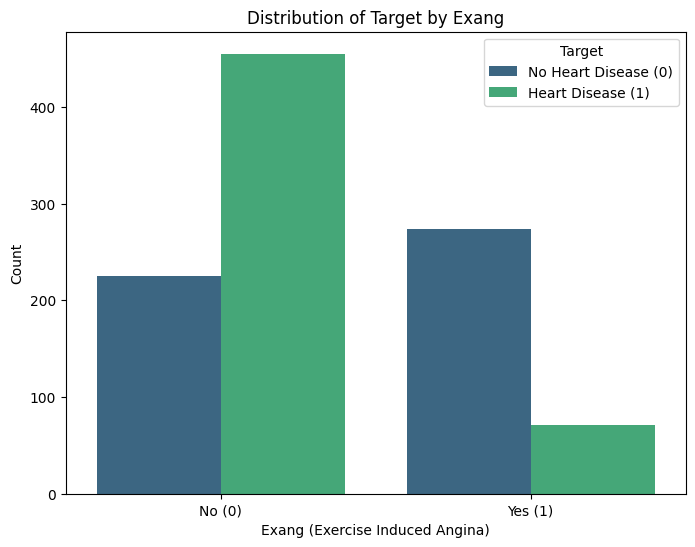

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='target', data=df, palette='viridis')
plt.title('Distribution of Target by Exang')
plt.xlabel('Exang (Exercise Induced Angina)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'])
plt.legend(title='Target', labels=['No Heart Disease (0)', 'Heart Disease (1)'])
plt.show()

In [8]:
print("Cross-tabulation of 'exang' and 'target':")
display(pd.crosstab(df['exang'], df['target'], margins=True, normalize='index'))

Cross-tabulation of 'exang' and 'target':


target,0,1
exang,,
0,0.330882,0.669118
1,0.794203,0.205797
All,0.486829,0.513171


2. Baseline Modeling

Given the binary nature of the target (Disease vs No Disease), we will start with a Logistic Regression model. This provides a solid baseline to measure future improvements against.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7951219512195122

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



3. Feature Engineering: One-Hot Encoding

Many of our features (like cp for chest pain type) are categorical but stored as integers. The model might incorrectly interpret type 3 pain as being "higher" than type 1 pain.

To fix this, we will convert categorical columns into Dummy Variables (One-Hot Encoding). This should improve model accuracy by treating categories as distinct features.

In [10]:
# Identify categorical columns that should be converted to dummy variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Display unique values and their counts for these columns to confirm their categorical nature
print("Unique values for potential categorical columns:")
for col in categorical_cols:
    print(f"\nColumn '{col}':")
    display(df[col].value_counts())


Unique values for potential categorical columns:

Column 'sex':


,count
sex,
1,713
0,312



Column 'cp':


,count
cp,
0,497
2,284
1,167
3,77



Column 'fbs':


,count
fbs,
0,872
1,153



Column 'restecg':


,count
restecg,
1,513
0,497
2,15



Column 'exang':


,count
exang,
0,680
1,345



Column 'slope':


,count
slope,
1,482
2,469
0,74



Column 'ca':


,count
ca,
0,578
1,226
2,134
3,69
4,18



Column 'thal':


,count
thal,
2,544
3,410
1,64
0,7


In [11]:
# Convert categorical columns into dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Display the first few rows of the new DataFrame with dummy variables
print("DataFrame after creating dummy variables:")
display(df_encoded.head())

# Display information about the new DataFrame to see the updated columns
print("\nInfo of the new DataFrame after dummy encoding:")
df_encoded.info()

DataFrame after creating dummy variables:


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0



Info of the new DataFrame after dummy encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   trestbps   1025 non-null   int64  
 2   chol       1025 non-null   int64  
 3   thalach    1025 non-null   int64  
 4   oldpeak    1025 non-null   float64
 5   target     1025 non-null   int64  
 6   sex_1      1025 non-null   int64  
 7   cp_1       1025 non-null   int64  
 8   cp_2       1025 non-null   int64  
 9   cp_3       1025 non-null   int64  
 10  fbs_1      1025 non-null   int64  
 11  restecg_1  1025 non-null   int64  
 12  restecg_2  1025 non-null   int64  
 13  exang_1    1025 non-null   int64  
 14  slope_1    1025 non-null   int64  
 15  slope_2    1025 non-null   int64  
 16  ca_1       1025 non-null   int64  
 17  ca_2       1025 non-null   int64  
 18  ca_3       1025 non-null   int64  
 19 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y) from the encoded DataFrame
X_encoded = df_encoded.drop('target', axis=1)
y_encoded = df_encoded['target']

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model on encoded data
model_encoded = LogisticRegression(max_iter=5000) # Increased max_iter to address ConvergenceWarning
model_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions on the encoded test set
y_pred_encoded = model_encoded.predict(X_test_encoded)

# Evaluate the model on encoded data
print("Model Accuracy (with dummy variables):", accuracy_score(y_test_encoded, y_pred_encoded))
print("\nClassification Report (with dummy variables):\n", classification_report(y_test_encoded, y_pred_encoded))

Model Accuracy (with dummy variables): 0.8195121951219512

Classification Report (with dummy variables):
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



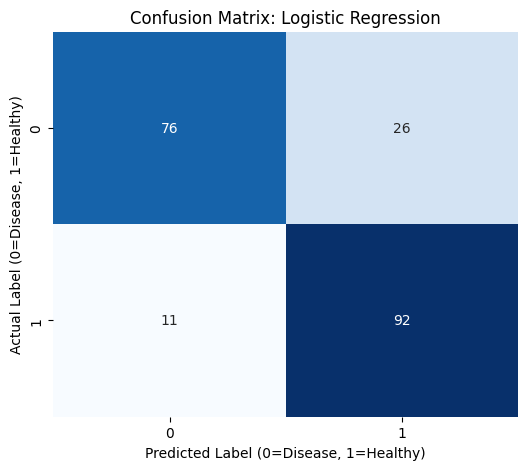

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate the matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# 2. Plot it nicely
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label (0=Disease, 1=Healthy)')
plt.ylabel('Actual Label (0=Disease, 1=Healthy)')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

4. Model Tuning: Minimizing False Negatives

By default, the model predicts "Disease" if the probability is > 50%.
However, in a medical setting, a False Negative (telling a sick patient they are healthy) is the most dangerous error.

I am lowering the decision threshold to 0.2 (20%).

Goal: Maximize Recall. We want to catch as many positive cases as possible.

Trade-off: This will increase False Positives (false alarms), but ensures we don't miss patients who need care.

Model Accuracy (with threshold=0.2): 0.7951219512195122

Classification Report (with threshold=0.2):
               precision    recall  f1-score   support

           0       0.94      0.63      0.75       102
           1       0.72      0.96      0.82       103

    accuracy                           0.80       205
   macro avg       0.83      0.79      0.79       205
weighted avg       0.83      0.80      0.79       205



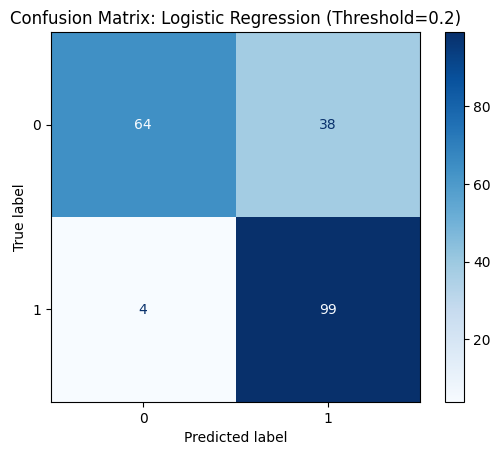

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model_encoded.predict_proba(X_test_encoded)[:, 1]

# Apply the new threshold (0.2)
threshold = 0.2
y_pred_thresholded = (y_pred_proba >= threshold).astype(int)

# Evaluate the model with the new threshold
print(f"Model Accuracy (with threshold={threshold}):", accuracy_score(y_test_encoded, y_pred_thresholded))
print(f"\nClassification Report (with threshold={threshold}):\n", classification_report(y_test_encoded, y_pred_thresholded))

# Generate and plot the new confusion matrix
cm_thresholded = confusion_matrix(y_test_encoded, y_pred_thresholded, labels=model_encoded.classes_)
disp_thresholded = ConfusionMatrixDisplay(confusion_matrix=cm_thresholded, display_labels=model_encoded.classes_)

disp_thresholded.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix: Logistic Regression (Threshold={threshold})')
plt.show()